In [1]:
import os
import sys
import pprint

base_dir = 'C:\Documents\Thesis_ssd\MasterThesis'
os.chdir(base_dir)

from Classes.DataProcessing.LoadData import LoadData
from Classes.DataProcessing.BaselineHelperFunctions import BaselineHelperFunctions
from Classes.DataProcessing.DataHandler import DataHandler
from Classes.DataProcessing.DataGenerator import DataGenerator
from Classes.Modeling.Models import Models
from Classes.Modeling.RandomGridSearch import RandomGridSearch
from Classes.Modeling.GridSearchResultProcessor import GridSearchResultProcessor
from Classes.Modeling.CustomCallback import CustomCallback
from Classes.Scaling.ScalerFitter import ScalerFitter
from Classes.Scaling.MinMaxScalerFitter import MinMaxScalerFitter
from Classes.Scaling.StandardScalerFitter import StandardScalerFitter
from Classes.Modeling.ResultFitter import ResultFitter
import json

In [2]:
resultFitter = ResultFitter(2)

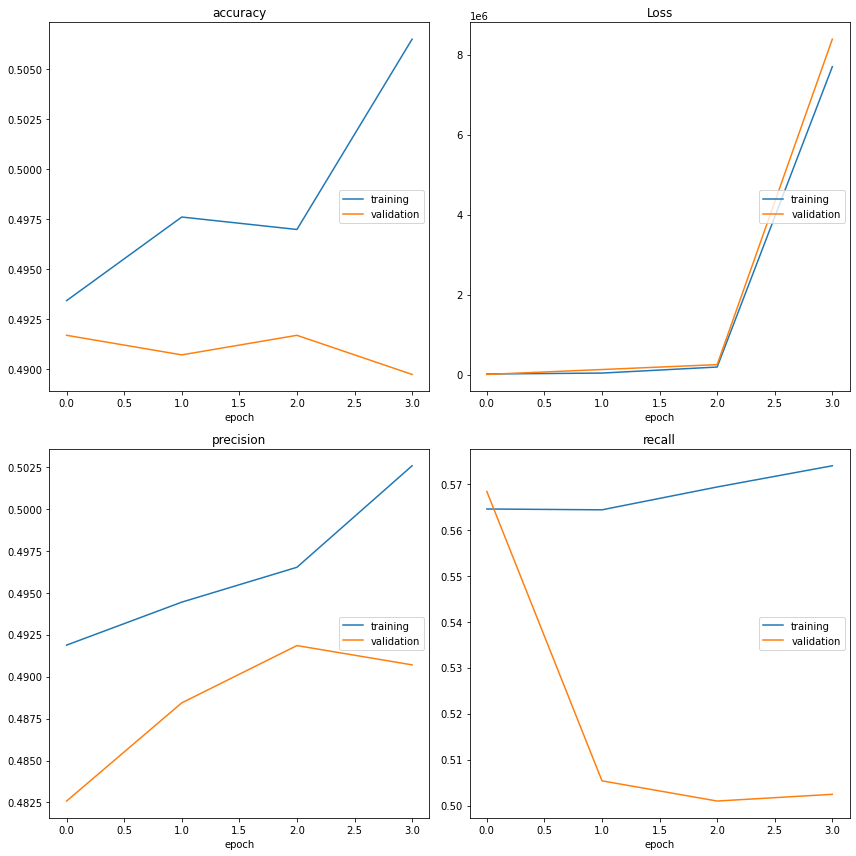

accuracy
	training         	 (min:    0.493, max:    0.506, cur:    0.506)
	validation       	 (min:    0.490, max:    0.492, cur:    0.490)
Loss
	training         	 (min: 13587.365, max: 7699466.000, cur: 7699466.000)
	validation       	 (min: 2383.629, max: 8388368.500, cur: 8388368.500)
precision
	training         	 (min:    0.492, max:    0.503, cur:    0.503)
	validation       	 (min:    0.483, max:    0.492, cur:    0.491)
recall
	training         	 (min:    0.564, max:    0.574, cur:    0.574)
	validation       	 (min:    0.501, max:    0.568, cur:    0.502)
Restoring model weights from the end of the best epoch.
22/21 [==============================] - 16s 722ms/step - loss: 7699466.0000 - accuracy: 0.5065 - precision: 0.5026 - recall: 0.5740 - val_loss: 8388368.5000 - val_accuracy: 0.4897 - val_precision: 0.4907 - val_recall: 0.5024
Epoch 00004: early stopping
Instructions for updating:
Please use Model.predict, which supports generators.
[[  2 418]
 [  1 402]]


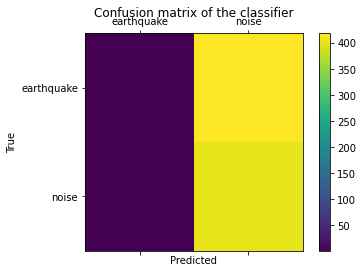

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test loss: 3155.81884765625
Test accuracy: 0.4951171875
Test precision: 0.4879867434501648
Test recall: 0.5751953125


In [4]:
result_file_name = 'results_8_test_earlyS_highpass-0.1.csv'
model = resultFitter.fit_from_csv_and_index(result_file_name, 0, 2, 10, use_tensorboard = False, 
                               use_liveplots = True, use_custom_callback = False)

In [11]:
result_file_name = 'results_6_sscale_noiseAug_earlyS.csv'
df = GridSearchResultProcessor().get_results_df_by_name(result_file_name, 2)

In [13]:
df[df.columns[0:13]]

batch_size  epochs  learning_rate optimizer start_neurons  dropout_rate  \
0          512      25        0.10000   rmsprop          relu         0.000   
1          256      35        0.00001       sgd       sigmoid         0.200   
2           16      30        0.10000      adam       softmax         0.400   
3           16      30        0.00100   rmsprop       softmax         0.000   
4          256      25        0.00001      adam       softmax         0.400   
5           64      35        0.00100       sgd       sigmoid         0.500   
6           16      25        0.01000       sgd       softmax         0.100   
7          128      35        0.00100      adam          relu         0.001   
8           16      30        0.00010   rmsprop       softmax         0.200   
9           16      25        0.00001   rmsprop          relu         0.000   
10         128      25        0.00100       sgd       sigmoid         0.000   
11         128      30        0.00001   rmsprop          tanh         0.200   
12         512      35        0.00001       sgd          relu         0.300   
13         256      35        0.10000      adam          relu         0.000   
14         256      25        0.00100       sgd          relu         0.500   
15         512      25        0.00010   rmsprop       softmax         0.200   
16          64      30        0.10000       sgd          relu         0.100   
17          64      35        0.00010       sgd          relu         0.000   
18         512      25        0.00100   rmsprop          relu         0.400   
19         128      30        0.01000   rmsprop          relu         0.100   
20          16      35        0.01000   rmsprop          relu         0.400   
21          16      35        0.00010       sgd          relu         0.001   
22          32      35        0.00100      adam       softmax         0.100   
23        1024      30        0.00001      adam       sigmoid         0.100   
24        1024      35        0.10000      adam       softmax         0.001   
25          64      35        0.00100      adam       sigmoid         0.000   
26         512      30        0.10000   rmsprop          relu         0.010   
27         512      25        0.00001   rmsprop       sigmoid         0.100   
28          16      25        0.00100   rmsprop       sigmoid         0.000   
29         256      35        0.00100   rmsprop          tanh         0.500   

    filters  kernel_size  padding    l2_r     l1_r activation  \
0        13            7   0.3000  0.0001  softmax       same   
1        23           11   0.0100  0.2000  softmax       same   
2        25           13   0.0001  0.0001  softmax       same   
3        11           13   0.0100  0.2000  sigmoid       same   
4        21           13   0.1000  0.2000  sigmoid       same   
5        15            9   0.0010  0.2000  sigmoid       same   
6        19           11   0.3000  0.2000  softmax       same   
7        17            5   0.2000  0.0100  sigmoid       same   
8        25           11   0.0010  0.3000  softmax       same   
9        17            9   0.2000  0.2000  softmax       same   
10       11            3   0.2000  0.0010  sigmoid       same   
11       23            9   0.1000  0.3000  sigmoid       same   
12       21           11   0.3000  0.2000  sigmoid       same   
13       23            7   0.1000  0.3000  sigmoid       same   
14       27            7   0.0100  0.0100  softmax       same   
15       25           15   0.0010  0.0001  sigmoid       same   
16       13           11   0.3000  0.0100  sigmoid       same   
17       27           15   0.0001  0.2000  softmax       same   
18       13            5   0.2000  0.0100  softmax       same   
19       17            5   0.3000  0.0010  softmax       same   
20       15           11   0.0100  0.3000  sigmoid       same   
21       21            5   0.0010  0.0100  sigmoid       same   
22       23            5   0.0100  0.0001  softmax       sa

In [ ]:
fit_from_csv_and_index(result_file_name, 0, 2)

In [ ]:
li = fit_from_csv_and_index(result_file_name, 0, 2)

In [ ]:
mysplit(result_fi)